# Introduction
This is the Marginal Effects at Means portion of the project
Please be sure to run DataCleaning.ipynb first to prepare the data

This notebook based on Fastai V1 ML course

## Imports
Import libraries and write settings here.

In [1]:
from fastai.tabular import *
from fastai import *

# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 60
pd.options.display.max_rows = 60

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

# Bootstrap

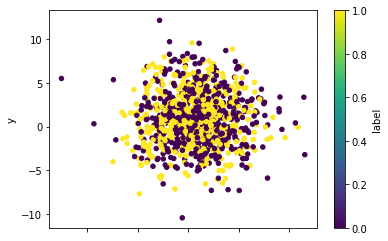

In [64]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d overlapping classification dataset
X,dep_var = make_blobs(n_samples=1000, centers=[(1,1),(1,1)],cluster_std=3, n_features=6)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1],x1=X[:,1],x2=X[:,1],x3=X[:,1],x4=X[:,1],label=dep_var))

df.plot.scatter(x='x',
                y='y',
                c='label',
                colormap='viridis')


In [65]:
df.head()

,x,y,x1,x2,x3,x4,label
0,1.597408,-0.072231,-0.072231,-0.072231,-0.072231,-0.072231,0
1,3.478358,3.490874,3.490874,3.490874,3.490874,3.490874,0
2,-1.817956,6.558654,6.558654,6.558654,6.558654,6.558654,0
3,1.521935,0.280484,0.280484,0.280484,0.280484,0.280484,0
4,1.901481,3.765446,3.765446,3.765446,3.765446,3.765446,1


## Generate train and test set

In [66]:
# split out train/test sets
from sklearn.model_selection import train_test_split

trn=tst=None
trn,tst = train_test_split(df, test_size=0.1)
print(str(len(trn)))
print(str(len(tst)))

900
100


In [68]:
# trn.head()

In [69]:
#split out trn_y and tst_y
#this is the dep_var, converted to an int
trn_y = trn['label'].copy()
tst_y = tst['label'].copy()
trn_y.astype('int64');
trn_y.astype('int64');

trn.drop('label',axis=1,inplace=True);
tst.drop('label',axis=1,inplace=True);

In [71]:
# tst.head()

# Train a RandomForest on all data

In [72]:
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display
from sklearn import metrics

In [98]:
rets = []
for _ in range(10000):
    #create a random forest object
    m_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score=True, max_features='auto', min_samples_leaf=10, verbose=False);

    #train the random forest 
    #the _= suppresses the output
    _= m_rf.fit(trn, trn_y);
    
    all = m_rf.predict_proba(tst)[:,0]
    avg = all.sum()/len(all)
    
    rets.append(avg) 
#     rets.append(m_rf.score(tst, tst_y)) 

In [99]:
rets

[0.49949653504787295,
 0.5089331792462272,
 0.5082065242913221,
 0.5006946420665823,
 0.5039884440379562,
 0.5000954613578401,
 0.5064943128992897,
 0.5027239567030187,
 0.5025565959928695,
 0.5055329339000096,
 0.5039151112080799,
 0.5048559489002912,
 0.5065661990484288,
 0.505451637824253,
 0.5025381298735784,
 0.5080009949317842,
 0.5062050731817709,
 0.5043768767681879,
 0.49901330633633023,
 0.5044760510010747,
 0.5081183794678261,
 0.5113964001527388,
 0.5073171645435177,
 0.501910544344989,
 0.5042507606251503,
 0.5101439357572041,
 0.5031731861325565,
 0.5032934601677118,
 0.5072703072766468,
 0.5073240488599288,
 0.5047137841956671,
 0.5050381730638941,
 0.5048037956908031,
 0.49951490976326396,
 0.5057385621639758,
 0.5027028106227501,
 0.5060322577287387,
 0.5095153176758183,
 0.5036517247509399,
 0.5048369349981168,
 0.506028987882322,
 0.500929438708065,
 0.5073001780614635,
 0.5039219030435849,
 0.5030514675838319,
 0.5102715407644695,
 0.4999334011872367,
 0.50160871228

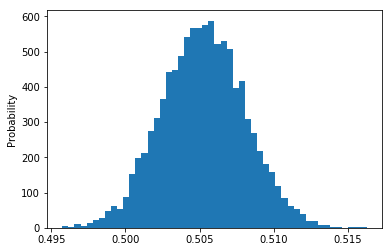

In [106]:
plt.hist(rets, bins=50)
plt.ylabel('Probability');

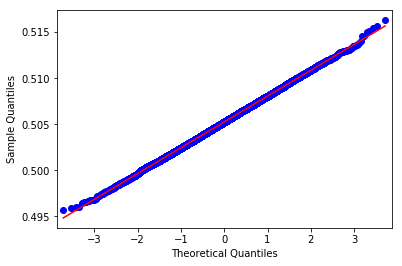

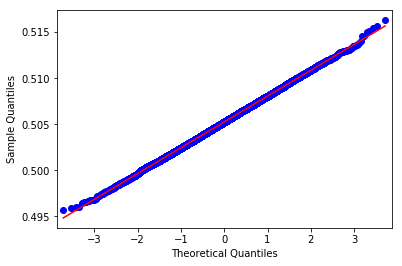

In [109]:
from statsmodels.graphics.gofplots import qqplot

# q-q plot
qqplot(np.ravel(rets), line='s')
# pyplot.show()

In [110]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# normality test
stat, p = shapiro(np.ravel(rets))
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=1.000, p=0.662
Sample looks Gaussian (fail to reject H0)


/home/keith/anaconda3/envs/fastai/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning:

p-value may not be accurate for N > 5000.



In [103]:
with open('bootstrap.pkl', 'wb') as f:
    pickle.dump(rets, f)

In [104]:
with open('bootstrap.pkl', 'rb') as f:
    mynewlist = pickle.load(f)